<a href="https://colab.research.google.com/github/AditMeh/deep-learning/blob/main/meta-learning/siamese_net/train_siamese_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AditMeh/deep-learning

Cloning into 'deep-learning'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 449 (delta 225), reused 186 (delta 78), pack-reused 0
Receiving objects: 100% (449/449), 24.51 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [2]:
%%capture
%cd ./deep-learning/meta-learning/siamese_net/
!git clone https://github.com/brendenlake/omniglot
%cd omniglot/python
!unzip images_background.zip
!unzip images_evaluation.zip
%cd ../..

In [3]:
from random import sample
from dataloader import RandomPairSampler, Ommniglot_Dataset
from torch.utils.data import DataLoader
from utils import dataset_to_dicts
from model import SiameseNet
from train import train_fixed_dataset, train_random_samples
import torch

TRAIN_DATASET_PATH = "omniglot/python/images_background/"
VALIDATION_DATASET_PATH = "omniglot/python/images_evaluation/"

ds_train_structured, ds_train_unstructured = dataset_to_dicts(
    TRAIN_DATASET_PATH)
ds_val_structured, ds_val_unstructured = dataset_to_dicts(
    VALIDATION_DATASET_PATH)

In [7]:
from torchvision import transforms

transforms_seq = transforms.Compose([transforms.RandomRotation((-20, 20)),
                                     transforms.GaussianBlur(3, (0.1, 5))])

In [8]:
train_dataset_random = RandomPairSampler(
    dataset_dict=ds_train_unstructured, sample_mode="uniform", is_val=False, transforms=transforms_seq)

val_dataset_random = RandomPairSampler(
    dataset_dict=ds_val_unstructured, sample_mode="uniform", is_val=True, transforms=transforms_seq)

train_loader_random = DataLoader(
    train_dataset_random, batch_size=32, num_workers=2)

val_loader_random = DataLoader(
    val_dataset_random, batch_size=32, num_workers=2)

TypeError: ignored

In [4]:
train_dataset_fixed = Ommniglot_Dataset(30000,
    dataset_dict=ds_train_structured, sample_mode="within alphabet", is_val=False, transforms=transforms_seq)

val_dataset_fixed = Ommniglot_Dataset(10000,
    dataset_dict=ds_val_structured, sample_mode="within alphabet", is_val=True, transforms=transforms_seq)

train_loader_fixed = DataLoader(
    train_dataset_fixed, batch_size=32, num_workers=2)

val_loader_fixed = DataLoader(
    val_dataset_fixed, batch_size=32, num_workers=2)

In [5]:
from dataloader import create_task_dataloader

from utils import create_task_files

pairs = create_task_files(ds_train_structured, 10, sample_mode="within alphabet")

loader = create_task_dataloader(pairs, 10)

net = SiameseNet()

for x1, x2, label in loader:
    print(label)



TypeError: ignored

tensor([1.])


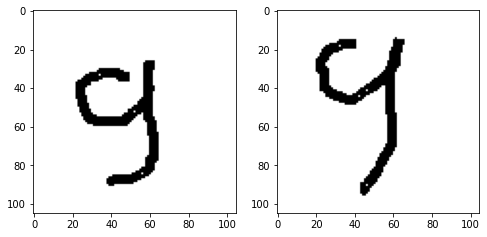

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x1, x2, label = next(iter(val_loader_fixed))
idx = 0

images = [torch.squeeze(x1[idx]).cpu().detach().numpy(), torch.squeeze(x2[idx]).cpu().detach().numpy()]

print(label[idx])

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i - 1], cmap='gray')
plt.show()

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

val_loss_history_random, train_loss_history_random = train_random_samples(net, train_loader_fixed, val_loader_fixed, samples_per_epoch=30000, samples_val=10000, n_epochs=20,
        lr=0.00001, device=device, batch_size=32, save_path="blank")

Training on device cuda.


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 1, Train Loss 0.6000342074873098, Val Loss 0.5641228201297613, Val Accuracy 0.711738782051282


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 2, Train Loss 0.48992011393147067, Val Loss 0.5277332163009888, Val Accuracy 0.7392828525641025


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 3, Train Loss 0.4049815472887318, Val Loss 0.4989303598801295, Val Accuracy 0.7624198717948718


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 4, Train Loss 0.3233006186107434, Val Loss 0.47214431048203737, Val Accuracy 0.7816506410256411


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 5, Train Loss 0.25444986311800327, Val Loss 0.47276809935768443, Val Accuracy 0.7748397435897436


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 6, Train Loss 0.1997978774037534, Val Loss 0.4829854622769814, Val Accuracy 0.7736378205128205


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 7, Train Loss 0.15011856275567886, Val Loss 0.4622368496388961, Val Accuracy 0.7899639423076923


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 8, Train Loss 0.11220945057279272, Val Loss 0.45117878154493296, Val Accuracy 0.7975761217948718


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 9, Train Loss 0.08273675367077107, Val Loss 0.4369134559081151, Val Accuracy 0.8053886217948718


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 10, Train Loss 0.058849792044884115, Val Loss 0.43780381710101396, Val Accuracy 0.8107972756410257


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 11, Train Loss 0.04058260801809829, Val Loss 0.4584862369661912, Val Accuracy 0.8057892628205128


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 12, Train Loss 0.02716544189708051, Val Loss 0.48673205932554525, Val Accuracy 0.7963741987179487


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 13, Train Loss 0.01830043038353324, Val Loss 0.48477688713524586, Val Accuracy 0.8011818910256411


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 14, Train Loss 0.012590821447763334, Val Loss 0.48429008095692366, Val Accuracy 0.8064903846153846


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 15, Train Loss 0.008852727326545606, Val Loss 0.48599052718148017, Val Accuracy 0.809395032051282
Epoch    15: reducing learning rate of group 0 to 1.0000e-06.


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 16, Train Loss 0.012349056602051142, Val Loss 0.4869980387962781, Val Accuracy 0.809395032051282


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 17, Train Loss 0.00834807941492293, Val Loss 0.4914081806364732, Val Accuracy 0.8102964743589743


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 18, Train Loss 0.006690426626746625, Val Loss 0.49416560956682914, Val Accuracy 0.8102964743589743


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 19, Train Loss 0.005533060381236698, Val Loss 0.49683842898752445, Val Accuracy 0.8111979166666666


100%|█████████▉| 311/312 [00:10<00:00, 30.63it/s]

Epoch 20, Train Loss 0.004628068004389916, Val Loss 0.4995612407055421, Val Accuracy 0.8111979166666666


In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

val_loss_history_fixed, train_loss_history_fixed = train_fixed_dataset(net, train_loader=train_loader_fixed, val_loader=val_loader_fixed, n_epochs=20, lr=0.00001, device=device, batch_size=32, save_path="wew")

Training on device cuda.


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1, Train Loss 0.05460861844186204, Val Loss 0.01752748943793888, Val Accuracy 0.7104632587859425


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2, Train Loss 0.043843543287902215, Val Loss 0.01625787222924562, Val Accuracy 0.7493011182108626


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3, Train Loss 0.035243360289988424, Val Loss 0.01504674839962738, Val Accuracy 0.7777555910543131


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4, Train Loss 0.02720965846730307, Val Loss 0.01446506641388606, Val Accuracy 0.7877396166134185


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5, Train Loss 0.020586951554696354, Val Loss 0.014520242805786121, Val Accuracy 0.7852436102236422


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6, Train Loss 0.016062089612487312, Val Loss 0.014560508775337341, Val Accuracy 0.7859424920127795


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7, Train Loss 0.012694498065847177, Val Loss 0.014002906234440999, Val Accuracy 0.7970247603833865


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8, Train Loss 0.009391504948357709, Val Loss 0.013444597210985022, Val Accuracy 0.8091054313099042


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9, Train Loss 0.006604882063918387, Val Loss 0.013526213048888852, Val Accuracy 0.8137979233226837


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10, Train Loss 0.0047627932590301545, Val Loss 0.013675765122492283, Val Accuracy 0.8148961661341853


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11, Train Loss 0.0034015235195781427, Val Loss 0.0141284092799567, Val Accuracy 0.810702875399361


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12, Train Loss 0.0022862926949360094, Val Loss 0.01470022461862086, Val Accuracy 0.8110023961661342


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13, Train Loss 0.0014554584188630044, Val Loss 0.014968554092089113, Val Accuracy 0.8121006389776357


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14, Train Loss 0.000911953258450878, Val Loss 0.014957908323754708, Val Accuracy 0.8141972843450479
Epoch    14: reducing learning rate of group 0 to 1.0000e-06.


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15, Train Loss 0.0012690867750180927, Val Loss 0.014551170627042032, Val Accuracy 0.819888178913738


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 16, Train Loss 0.0009170790726552158, Val Loss 0.014673160036472371, Val Accuracy 0.818091054313099


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 17, Train Loss 0.0007403232141888102, Val Loss 0.014773713893438586, Val Accuracy 0.8176916932907349


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 18, Train Loss 0.0006157082039955855, Val Loss 0.014867914959597892, Val Accuracy 0.8175918530351438


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 19, Train Loss 0.0005181141277716961, Val Loss 0.01496618861308732, Val Accuracy 0.818091054313099


100%|██████████| 313/313 [00:10<00:00, 30.38it/s]

Epoch 20, Train Loss 0.0004385375511821749, Val Loss 0.015067377292845671, Val Accuracy 0.8178913738019169
Epoch    20: reducing learning rate of group 0 to 1.0000e-07.


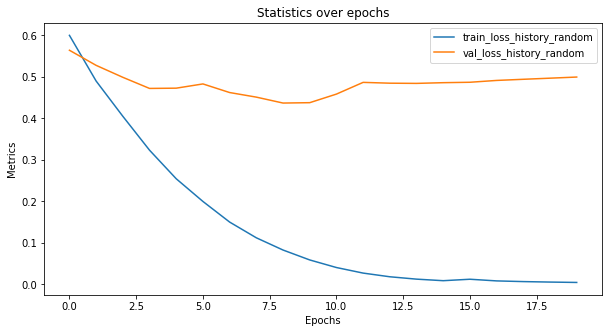

In [ ]:
from utils import plot_train_graph
plot_train_graph(train_loss_history_random=train_loss_history_random, val_loss_history_random=val_loss_history_random)

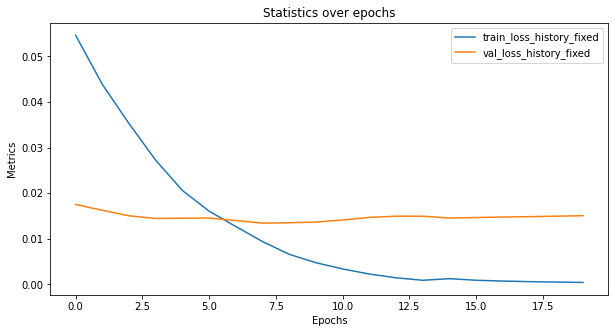

In [ ]:
plot_train_graph(train_loss_history_fixed=train_loss_history_fixed, val_loss_history_fixed=val_loss_history_fixed)